In [2]:
from pathlib import Path
PROJECT_ROOT = Path(Path.cwd()).resolve().parents[0]

# Введение
## Цель анализа
- выявить ключевые факторы, влияющие на формирование цены
- выделить тренды и структуру данных
## О данных
Набор данных Yahoo Finance Dataset - это финансовый набор данных, содержащий ежедневные данные о фондовом рынке по нескольким активам, таким как акции, ETF и индексы. в EDA рассматривается период с 1 апреля 2018 года по 31 марта 2023 года и содержит 1257 строк и 7 столбцов. Данные были получены из Yahoo Finance, и цель этого набора данных - предоставить исследователям, аналитикам и инвесторам всеобъемлющий набор данных, который они могут использовать для анализа тенденций фондового рынка, выявления закономерностей и разработки инвестиционных стратегий.
### Для чего используется
Набор данных может использоваться для различных задач, включая прогнозирование цен на акции, анализ тенденций, оптимизацию портфеля и управление рисками.

### Набор данных содержит следующие столбцы:

- `Date`: Дата, на которую были опубликованы данные о фондовом рынке.
- `Open`: Цена актива на момент открытия на указанную дату.
- `High`: самая высокая цена актива на указанную дату.
- `Low`: самая низкая цена актива на данную дату.
- `Close`: цена закрытия актива на указанную дату. Обратите внимание, что эта цена не учитывает какие-либо дополнительные торги, которые могли произойти после официального закрытия рынка. 
- `Adj. Close`: Скорректированная цена закрытия актива на указанную дату. Эта цена учитывает любые возможные дивиденды, дробление акций или другие корпоративные действия, которые могут повлиять на цену акций.
- `Volume`: Общее количество акций актива, которые были проданы на указанную дату.

Все переменные количественные:
- `Date`, `Volume` - дискретные
- `Open`, `Open`, `High`, `Low`, `Close`, `Adj Close` - числовые

# Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Загрузка данных

In [4]:
df = pd.read_excel(f"{PROJECT_ROOT}/data/yahoo_data.xlsx")
df.rename(columns={'Close*':'Close','Adj Close**': 'Adj Close'}, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Apr 28, 2023",33797.430,34104.560,33728.400,34098.160,34098.160,354310000
1,"Apr 27, 2023",33381.660,33859.750,33374.650,33826.160,33826.160,343240000
2,"Apr 26, 2023",33596.340,33645.830,33235.850,33301.870,33301.870,321170000
3,"Apr 25, 2023",33828.340,33875.490,33525.390,33530.830,33530.830,297880000
4,"Apr 24, 2023",33805.040,33891.150,33726.090,33875.400,33875.400,252020000
...,...,...,...,...,...,...,...
1253,"May 07, 2018",24317.660,24479.450,24263.420,24357.320,24357.320,307670000
1254,"May 04, 2018",23865.220,24333.350,23778.870,24262.510,24262.510,329480000
1255,"May 03, 2018",23836.230,23996.150,23531.310,23930.150,23930.150,389240000
1256,"May 02, 2018",24097.630,24185.520,23886.300,23924.980,23924.980,385350000


## Предобработка (для анализа)

### Преобразование даты к соответствующему типу

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

### Установка даты как индекса

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

## Описание датасета

### Типы данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2023-04-28 to 2018-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


### Пропуски и дубликаты

In [8]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.index.duplicated().sum()

np.int64(0)

ни того, ни другого нет

### Пропущенные даты

In [10]:
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
missing_dates = date_range.difference(df.index.tolist())

print(f"\nДиапазон дат: с {df.index.min()} по {df.index.max()}")
print(f"Всего дней в диапазоне: {len(date_range)}")
print(f"Дней в данных: {len(df)}")
print(f"Пропущенных торговых дней: {len(missing_dates)}")

if len(missing_dates) > 0:
    print("\nПервые 10 пропущенных дат:")
    print(missing_dates[:10])



Диапазон дат: с 2018-05-01 00:00:00 по 2023-04-28 00:00:00
Всего дней в диапазоне: 1824
Дней в данных: 1258
Пропущенных торговых дней: 566

Первые 10 пропущенных дат:
DatetimeIndex(['2018-05-05', '2018-05-06', '2018-05-12', '2018-05-13',
               '2018-05-19', '2018-05-20', '2018-05-26', '2018-05-27',
               '2018-05-28', '2018-06-02'],
              dtype='datetime64[ns]', freq=None)


Пропуски данных в нашем случае могут возникать из-за:

1. Технических проблем: Ошибки при загрузке данных.
2. Неактивных торговых дней: Выходные или праздничные дни.
3. Корпоративных действий: Разделение акций и другие изменения.
4. Чистки данных: Удаление ненадежных записей.

В нашем случае наиболее вероятная причина - неактивные торговые дни (сб, вс)

Для обработки пропусков можно использовать методы удаления, заполнения средними значениями или интерполяцию.


# Анализ данных

## Анализ временного ряда

In [11]:
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Динамика цен закрытия', 'Объем торгов'),
    vertical_spacing=0.1,
    row_heights=[0.7, 0.3]
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Close Price',
        line=dict(color='green', width=2),
        hovertemplate='Дата: %{x}<br>Цена: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=df.index,
        y=df['Open'],
        mode='lines',
        name='Open Price',
        line=dict(color='red', width=2),
        hovertemplate='Дата: %{x}<br>Цена: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# скользящие средние
window_7 = df['Close'].rolling(window=7).mean()
window_30 = df['Close'].rolling(window=30).mean()

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=window_7,
        mode='lines',
        name='MA 7 дней',
        line=dict(color='orange', width=1.5, dash='dash'),
        hovertemplate='Дата: %{x}<br>MA7: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df.index,
        y=window_30,
        mode='lines',
        name='MA 30 дней',
        line=dict(color='red', width=1.5, dash='dash'),
        hovertemplate='Дата: %{x}<br>MA30: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=df.index,
        y=df['Volume'],
        name='Volume',
        marker_color='blue',
        hovertemplate='Дата: %{x}<br>Объем: %{y:,}<extra></extra>'
    ),
    row=2, col=1
)

fig.update_layout(
    height=800,
    title_text="Анализ временных рядов акции",
    showlegend=True,
    hovermode='x unified'
)

fig.update_xaxes(title_text="Дата", row=2, col=1)
fig.update_yaxes(title_text="Цена закрытия", row=1, col=1)
fig.update_yaxes(title_text="Объем", row=2, col=1)

fig.show()

- **Экстремальное рыночное событие:** На графике четко идентифицируется период высокой волатильности и стрессового падения в феврале-марте 2020 года, когда цена индекса упала с уровня ~28,000 до локального минимума ~19,000 пунктов. Это соответствует общемировому обвалу рынков на фоне объявления пандемии COVID-19, введения локдаунов и высокой экономической неопределенности. И возвращается к прежней норме примерно в июле. - этот период далее будет называться **кризисом**

- **Динамика объема**: Параллельно с обвалом цены наблюдался взрывной рост объема торгов, что типично для периодов паники и массовой ликвидации позиций. Высокий объем подтверждает значимость и "истинность" этого ценового движения.

- **Фаза восстановления**: За резким падением последовало активное восстановление, поддержанное беспрецедентными мерами денежно-кредитного стимулирования (со стороны ФРС и других центробанков). Рост продолжался до начала 2022 года.

- **Новый режим объема**: После пика 2020 года средний уровень объема торгов стабилизировался на отметке выше, чем в докризисный период (до 2020 года), что может свидетельствовать о структурном изменении на рынке (например, увеличение участия розничных инвесторов, рост волатильности как новой нормы).

поскольку наблюдается 2 тренда, требуется разбить анализ на 3 части: до, во время, и после кризиса

In [12]:
crisis_start = '2020-02-01'
crisis_end = '2020-06-30'

pre_crisis_mask = df.index < crisis_start
crisis_mask = (df.index >= crisis_start) & (df.index <= crisis_end)
post_crisis_mask = df.index > crisis_end

## Гистограммы

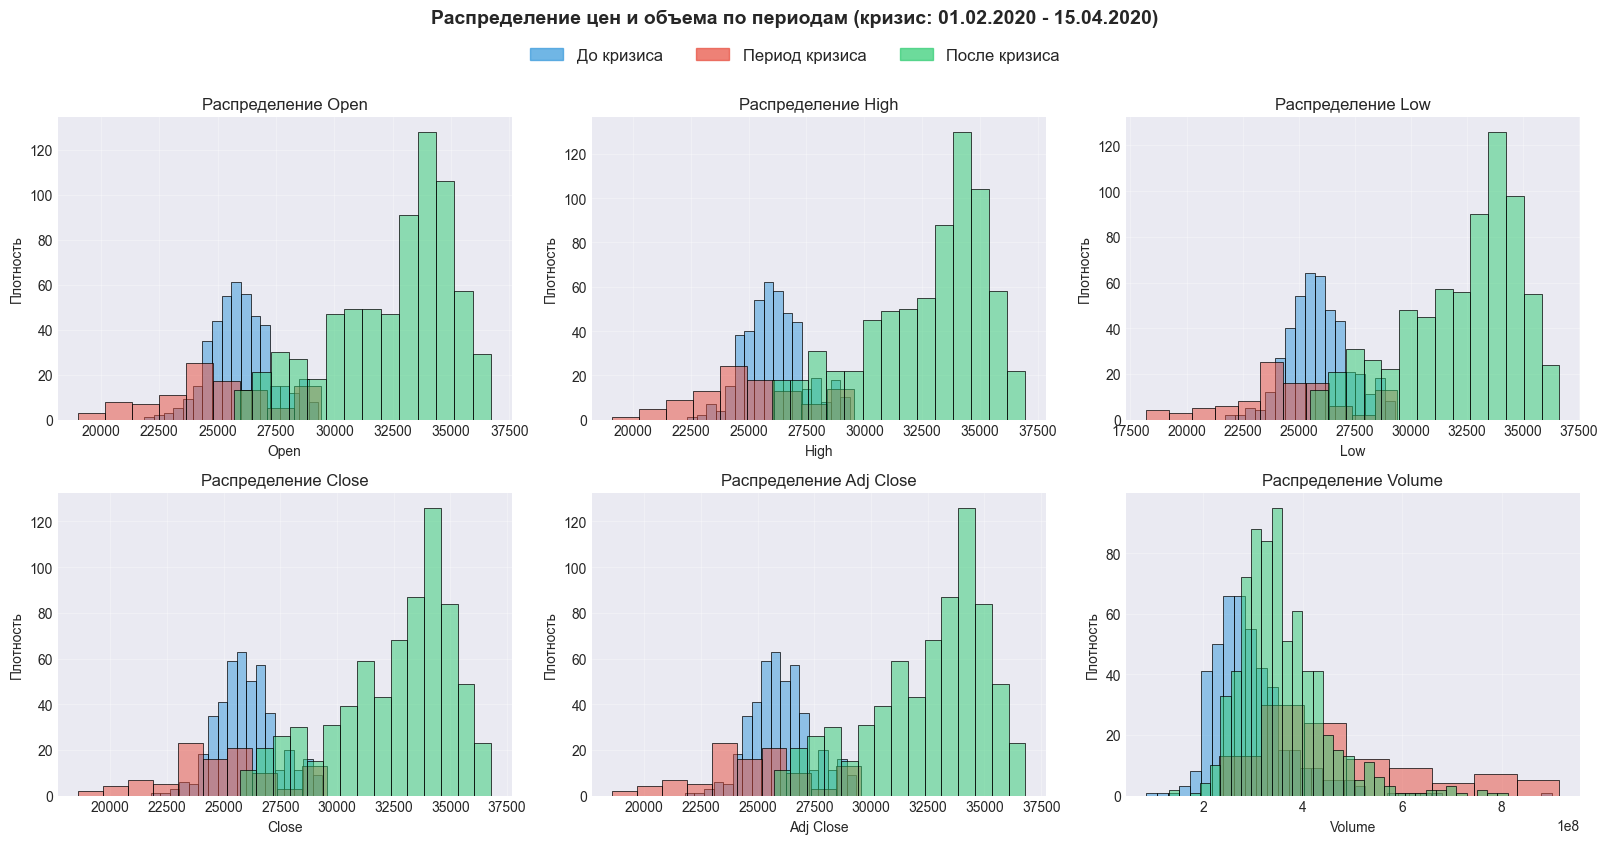

In [13]:
import matplotlib.patches as mpatches

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71']  # синий, красный, зеленый
labels = ['До кризиса', 'Период кризиса', 'После кризиса']

for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']):
    ax = axes[i]
    
    # KDE для каждого периода
    sns.histplot(data=df[pre_crisis_mask][col], ax=ax, color=colors[0], # type: ignore
                label=labels[0], fill=True, alpha=0.5, linewidth=0.5) 
    sns.histplot(data=df[crisis_mask][col], ax=ax, color=colors[1], # type: ignore
                label=labels[1], fill=True, alpha=0.5, linewidth=0.5)
    sns.histplot(data=df[post_crisis_mask][col], ax=ax, color=colors[2],  # type: ignore
                label=labels[2], fill=True, alpha=0.5, linewidth=0.5)
    
    ax.set_title(f'Распределение {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Плотность')
    ax.grid(True, alpha=0.3)


legend_patches = [
    mpatches.Patch(color=colors[0], alpha=0.7, label=labels[0]),
    mpatches.Patch(color=colors[1], alpha=0.7, label=labels[1]),
    mpatches.Patch(color=colors[2], alpha=0.7, label=labels[2])
]

fig.legend(handles=legend_patches, loc='upper center', 
          bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize=12)

fig.suptitle('Распределение цен и объема по периодам (кризис: 01.02.2020 - 15.04.2020)', 
             fontsize=14, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

Цены:
- Цены явно делятся на эпоху "до" и "после". Это говорит о влиянии кризиса.
- Сам период кризиса отмечается низкими ценами

Объем:
- Если распределение объема продаж похоже на экспоненциальное, это может указывать на наличие нескольких периодов с высокими и низкими объемами. В таком случае, логарифмирование объемов может помочь сгладить распределение и уменьшить влияние крупных выбросов, что может улучшить силу предсказаний.
- Логарифмирование также делает модель более устойчивой, особенно при использовании методов машинного обучения.
- Период кризиса отмечается особо большими объемами торгов

#### Логарифмирование Volume

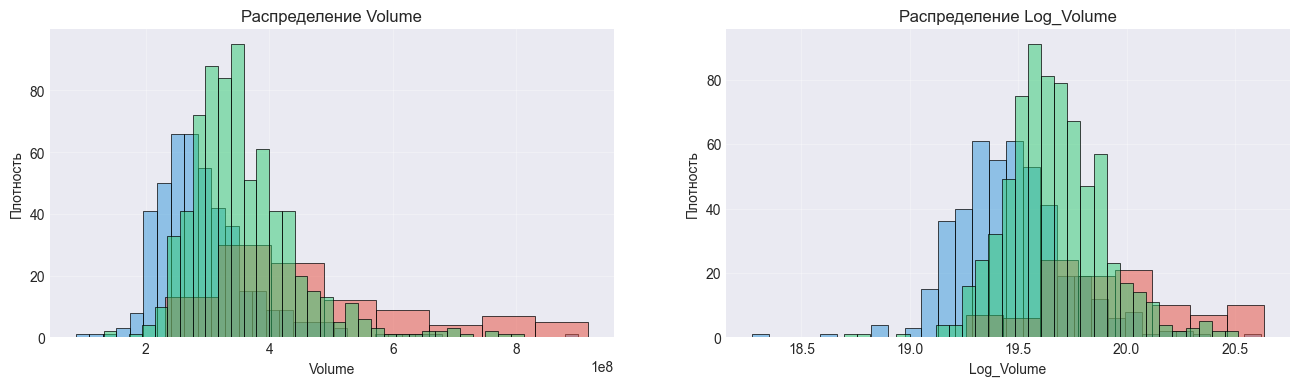

In [14]:
df['Log_Volume'] = np.log1p(df['Volume'])
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

for i, col in enumerate(['Volume','Log_Volume']):
    ax = axes[i]
    
    # KDE для каждого периода
    sns.histplot(data=df[pre_crisis_mask][col], ax=ax, color=colors[0], #type: ignore
                label=labels[0], fill=True, alpha=0.5, linewidth=0.5)
    sns.histplot(data=df[crisis_mask][col], ax=ax, color=colors[1],  #type: ignore
                label=labels[1], fill=True, alpha=0.5, linewidth=0.5)
    sns.histplot(data=df[post_crisis_mask][col], ax=ax, color=colors[2], #type: ignore
                label=labels[2], fill=True, alpha=0.5, linewidth=0.5)
    
    ax.set_title(f'Распределение {col}', fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel('Плотность')
    ax.grid(True, alpha=0.3)

- после логарифмирования, значения объема действительно стали ближе к нормальному распределению

## Статистический анализ

### До кризиса

In [15]:
df[pre_crisis_mask].describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Volume
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,26011.576,26133.836,25881.318,26017.010,26017.010,294137760.181,19.466
std,1313.314,1284.876,1347.674,1313.271,1313.271,82185025.437,0.252
min,21857.730,22339.870,21712.530,21792.200,21792.200,86150000.000,18.272
25%,25140.475,25309.340,24987.165,25164.190,25164.190,241467500.000,19.302
50%,25942.405,26047.235,25787.685,25958.440,25958.440,280715000.000,19.453
75%,26809.865,26905.735,26715.450,26795.120,26795.120,327442500.000,19.607
max,29313.310,29373.620,29289.910,29348.100,29348.100,900510000.000,20.618


### Во время кризиса

In [16]:
df[crisis_mask].describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Volume
count,104.000,104.000,104.000,104.000,104.000,104.000,104.000
mean,24900.923,25188.490,24559.374,24883.273,24883.273,480475000.000,19.935
std,2543.120,2421.577,2646.820,2530.567,2530.567,166024890.735,0.331
min,19028.360,19121.010,18213.650,18591.930,18591.930,231000000.000,19.258
25%,23572.077,23706.408,23304.570,23532.075,23532.075,364752500.000,19.715
50%,24595.100,24878.565,24412.435,24615.615,24615.615,450065000.000,19.925
75%,26327.640,26626.252,25915.993,26184.548,26184.548,567602500.000,20.157
max,29440.470,29568.570,29406.750,29551.420,29551.420,915990000.000,20.636


### После кризиса

In [17]:
df[post_crisis_mask].describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Volume
count,712.000,712.000,712.000,712.000,712.000,712.000,712.000
mean,32506.647,32708.763,32295.706,32512.104,32512.104,356898525.281,19.666
std,2582.808,2569.610,2587.354,2582.245,2582.245,87128948.051,0.227
min,25690.350,26019.310,25523.510,25706.090,25706.090,131660000.000,18.696
25%,30899.330,31110.165,30600.517,30956.748,30956.748,301627500.000,19.525
50%,33171.575,33404.400,32981.310,33208.445,33208.445,343700000.000,19.655
75%,34458.062,34633.402,34254.065,34430.870,34430.870,395420000.000,19.795
max,36722.600,36952.650,36636.000,36799.650,36799.650,811890000.000,20.515


## Анализ волатильности цен

In [18]:
diff_Open_Close = df['Open'] - df['Close']
diff_High_Low = df['High'] - df['Low']

### Разница между открывающей и закрывающей ценой

count    1258.000
mean       -3.539
std       278.069
min     -1282.890
25%      -151.765
50%       -17.215
75%       124.960
max      1154.340
dtype: float64

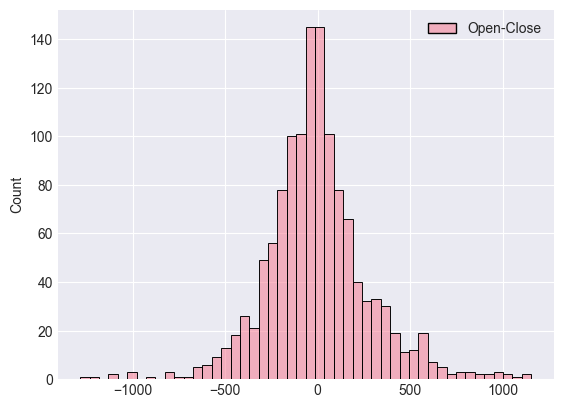

In [19]:
sns.histplot({"Open-Close": diff_Open_Close})
display(diff_Open_Close.describe())

- Распределение очень похоже на нормальное, с довольно , с центром в 0 и довольно легкими хвостами, что говорит об относительной стабильности. Стоит проверить это с помощью эксцесса.

> Куртозис ($\gamma_2+3$) является важной характеристикой распределения данных, которая помогает понять, насколько распределение отличается от нормального в отношении формы, особенно в части "ширины" и "высоты" хвостов.

> Эксцесс - тот же куртозис, только с вычтенной тройкой. Формула:
$$\gamma_2=\frac{\mathbb{E}(X-\mathbb{E}X)^4}{(\mathbb{D}X)^2}-3$$
Значение эксцесса:
- $\gamma_2 \approx 0$: Распределение является нормальным (мезокуртическое).
- $\gamma_2 > 0$: Распределение имеет "высокие" пики и "толстые" хвосты (пикнарное распределение).
- $\gamma_2 < 0$: Распределение более плоское, с более тонкими хвостами по сравнению с нормальным распределением (платикуртическое распределение).

In [20]:
from scipy import stats

stats.kurtosis(diff_Open_Close, fisher=True) # Эксцесс эквивалентен куртозису по определению Фишера

np.float64(2.4990322909571496)

- высокое значение указывает на очень высокие пики и толстые хвосты. Это значит, что большее количество значений находится в области среднего значения, но присутствует немалое количество выбросов.

### Разница между минимальной и максимальной ценой

count    1258.000
mean       -3.539
std       278.069
min     -1282.890
25%      -151.765
50%       -17.215
75%       124.960
max      1154.340
dtype: float64

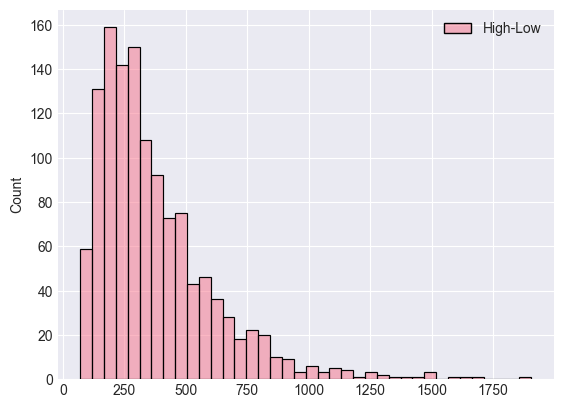

In [21]:
sns.histplot({"High-Low": diff_High_Low})
display(diff_Open_Close.describe())

- распределение между верхней и нижней ценой, близко к эспоненциальному (Пуассоновскому, т.к. распределено во времени). 

**Экспоненциальное распределение описывает время между событиями в процессе Пуассона**. Для ценового диапазона это означает:
- Ненулевая мода (пик) около относительно небольшого значения
- Длинный правый хвост - редкие, но очень широкие дневные диапазоны
- Монотонно убывающая функция плотности

**Что из этого следует для финансового анализа**

1. Характер внутридневной волатильности
- Большинство дней - спокойные: Основная масса торговых дней имеет относительно небольшой диапазон (цена мало двигается внутри дня).
- Редкие, но экстремальные события: Небольшая часть дней приносит огромную внутридневную волатильность. Это дни паники, важных новостей, выхода макростатистики.
- "Память" процесса: Экспоненциальное распределение предполагает отсутствие памяти - ширина диапазона сегодня не зависит от ширины диапазона вчера (в рамках модели).

2. Практические следствия для трейдинга и риск-менеджмента
- Стоп-лоссы должны быть адаптивными: Поскольку большинство дней имеют небольшой диапазон, но периодически случаются всплески, фиксированные стоп-лоссы будут слишком часто срабатывать в спокойные дни и "пробиваться" в волатильные дни.
- Позиционирование по волатильности: Стратегии, продающие волатильность (например, продажа опционов), могут получать стабильный доход в спокойные периоды, но подвергаются риску катастрофических убытков в редкие экстремальные дни.
- Оценка Value at Risk (VaR): Экспоненциальный хвост означает, что нормальное распределение будет сильно недооценивать риск экстремальных движений.

3. Теоретические и экономические интерпретации
- Гипотеза прерывистой торговли: Цены движутся скачками, а не плавно. Много времени проходит без значительных изменений, затем происходит резкий скачок.
- Присутствие рыночных шоков: Распределение отражает, что рынок большую часть времени находится в состоянии равновесия, но периодически испытывает шоки, вызывающие резкие переоценки.

Согласуется с моделью Миртла-Скота: Волатильность сама является случайной величиной с тяжелыми хвостами.

## Корелляции

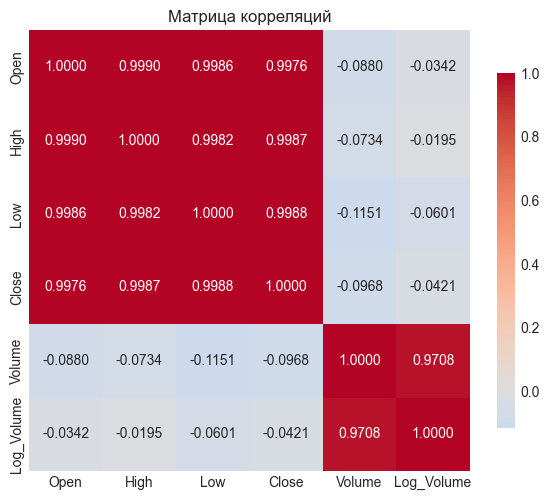

In [22]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Volume']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.4f', 
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()

- Ценовые переменные почти идеально коррелированы (0.998-1.000)

- Open, High, Low, Close, Adj Close практически линейно зависимы. Это ожидаемо: цены в течение дня движутся согласованно -> *Следствие: В моделях можно использовать только одну ценовую переменную (например, Close), остальные дают избыточную информацию*

- Корреляция между Volume и ценами слабая и отрицательная (-0.115 до -0.034)

- Самый сильный эффект: Low цена отрицательно коррелирует с Volume (-0.115)

- В дни с высоким объемом цена Low ниже обычного (логично: панические продажи)

- Вывод: Объем слабо, но отрицательно связан с ценами

- Логарифмирование сохранило структуру, но уменьшило экстремальные значения

- Log_Volume слабее коррелирует с ценами, чем обычный Volume

- Adj Close и Close корреляция 1.000

**Выводы**:
- Мультиколлинеарность: Ценовые переменные почти линейно зависимы
- Volume отдельный сигнал: Объем дает информацию, не дублируемую ценами
- Логарифмирование помогает: Log_Volume имеет более "нормальные" связи с ценами

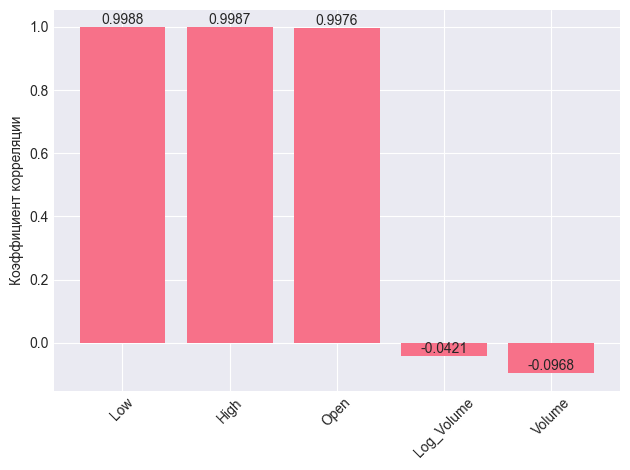

<Figure size 640x480 with 0 Axes>

In [23]:
close_corr = correlation_matrix['Close'].sort_values(ascending=False)[1:]

fig, ax = plt.subplots()
bars = ax.bar(close_corr.index, close_corr.values) #type: ignore

ax.set_ylabel('Коэффициент корреляции')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.show()

### Автокорелляции

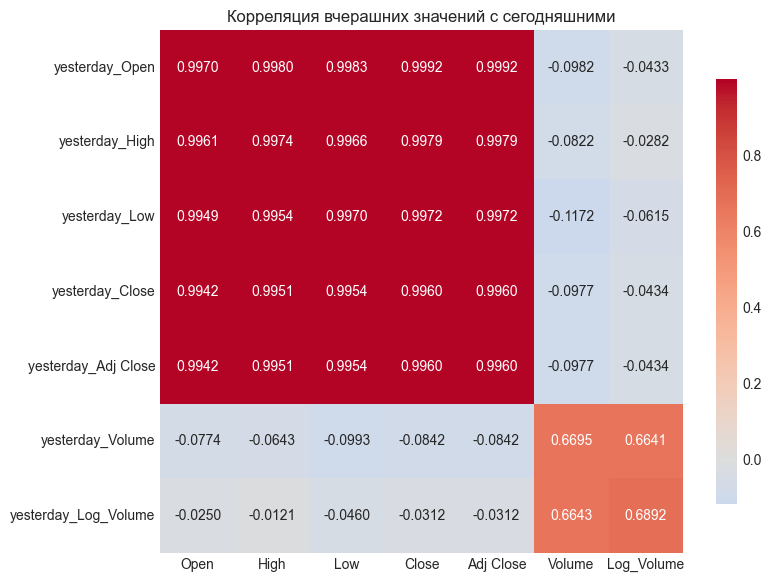

In [24]:
# Создаем лагированные переменные (сдвиг на 1 день)
lagged_df = df.shift(1)  # предыдущий день
lagged_df.columns = [f'yesterday_{col}' for col in lagged_df.columns]

combined_df = pd.concat([df, lagged_df], axis=1)

combined_df = combined_df.dropna()

price_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Log_Volume']
lagged_price_cols = [f'yesterday_{col}' for col in price_cols]

lag_corr_matrix = combined_df[lagged_price_cols + price_cols].corr()

# извлекаем только корреляции "вчера vs сегодня"
lag_vs_today = lag_corr_matrix.loc[lagged_price_cols, price_cols]

plt.figure(figsize=(8, 6))
sns.heatmap(lag_vs_today, 
            annot=True, 
            fmt='.4f', 
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={"shrink": 0.8})
plt.title('Корреляция вчерашних значений с сегодняшними')
plt.tight_layout()
plt.show()

1. **Ценовые переменные: очень высокая корреляция (0.994-0.999)**
- Open сегодня vs Close вчера: 0.994 → Цена открытия сильно зависит от цены закрытия предыдущего дня

- Close сегодня vs Close вчера: 0.996 → Сильная автокорреляция, рынок имеет трендовый характер

- Практически идеальная корреляция между всеми вчерашними и сегодняшними ценами

- Финансовая интерпретация: Рынок демонстрирует высокую инерционность - сегодняшние цены очень похожи на вчерашние, что характерно для трендовых рынков.

2. **Объемы: умеренная автокорреляция**
- Volume сегодня vs Volume вчера: 0.669
- Log_Volume сегодня vs Log_Volume вчера: 0.689

- Вывод: Объемы также имеют инерцию, но слабее, чем цены. Высокий объем вчера → вероятно высокий объем сегодня.

3. **Кросс-корреляции между объемом и ценами:**
- Вчерашний Volume vs сегодняшние цены: слабо отрицательная (-0.117 до -0.064)

- Самый сильный эффект: вчерашний Low отрицательно коррелирует с сегодняшним Low (-0.117)

- Интерпретация: Высокий объем вчера слабо ассоциирован с более низкими ценами сегодня.

## Объем продаж в сравнении с ценой закрытия

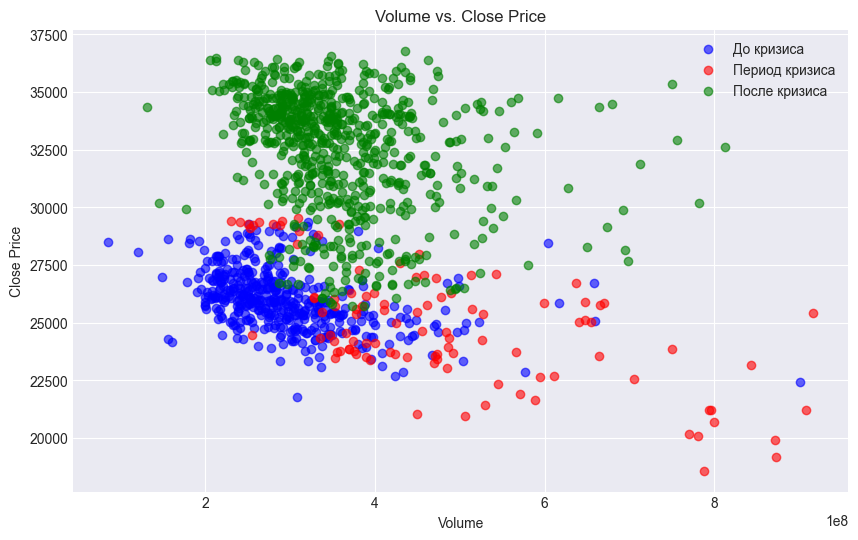

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df[pre_crisis_mask]['Volume'], df[pre_crisis_mask]['Close'], label='До кризиса',  alpha=0.6, color='blue')
plt.scatter(df[crisis_mask]['Volume'], df[crisis_mask]['Close'], alpha=0.6, label='Период кризиса', color='red')
plt.scatter(df[post_crisis_mask]['Volume'], df[post_crisis_mask]['Close'], label='После кризиса', alpha=0.6, color='green')
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend();

- распределение цен и покупок также явно разделимо, как и на гистограммах (синий)
- существенная часть выбросов появилась в период кризиса (красные точки)

## Анализ выбросов

In [25]:
# Скользящее окно + IQR
def iqr_outliers(series, window=30, thresh=3):
    q1 = series.rolling(window).quantile(0.25)
    q3 = series.rolling(window).quantile(0.75)
    iqr = q3 - q1
    return (series < q1 - thresh*iqr) | (series > q3 + thresh*iqr)

# Волатильность (Z-score)
def vol_outliers(series, window=20, n_std=3):
    mean = series.rolling(window).mean()
    std = series.rolling(window).std()
    return abs(series - mean) > n_std * std

In [26]:
import plotly.graph_objects as go

def plot_outliers(series, outliers, title="Выбросы"):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=series.index, y=series, 
                            mode='lines', name='Ряд'))
    if outliers.sum() > 0:
        fig.add_trace(go.Scatter(
            x=series.index[outliers], y=series[outliers],
            mode='markers', name='Выбросы', marker=dict(color='red', size=8)
        ))
    fig.update_layout(title=title)
    fig.show()

In [42]:
# Детектирование несколькими методами
outliers_iqr = iqr_outliers(df['Close'], window=30)
outliers_vol = vol_outliers(df['Close'], window=30)

# Консенсус (выброс если минимум 2 метода)
consensus = outliers_iqr | outliers_vol

# Фильтрация по объему (для финансов)
high_volume = df['Volume'] > 2 * df['Volume'].median()
real_events = consensus & high_volume
potential_errors = consensus & ~high_volume

plot_outliers(df['Close'], real_events, "Реальные события")
plot_outliers(df['Close'], potential_errors, "Возможные ошибки / случайные блуждания")

## Анализ сезонности

In [28]:
df_copy = df.copy().reset_index()
df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Weekday'] = df_copy['Date'].dt.dayofweek  # 0 = понедельник, 6 = воскресенье
df_copy['Quarter'] = df_copy['Date'].dt.quarter
df_copy['Month_Name'] = df_copy['Date'].dt.month_name()

In [29]:
years = df_copy['Year'].unique()
sorted(years)

[np.int32(2018),
 np.int32(2019),
 np.int32(2020),
 np.int32(2021),
 np.int32(2022),
 np.int32(2023)]

### Анализ по кварталам

График отображает **среднюю цену закрытия** за каждый квартал в течение нескольких лет. 

- **Ось X** показывает кварталы+год, а **ось Y** - средние цены.
- **Столбцы** представляют среднюю цену закрытия: более высокий столбец указывает на большую цену.
- **Полосы ошибок** показывают стандартное отклонение, указывая на волатильность цен.

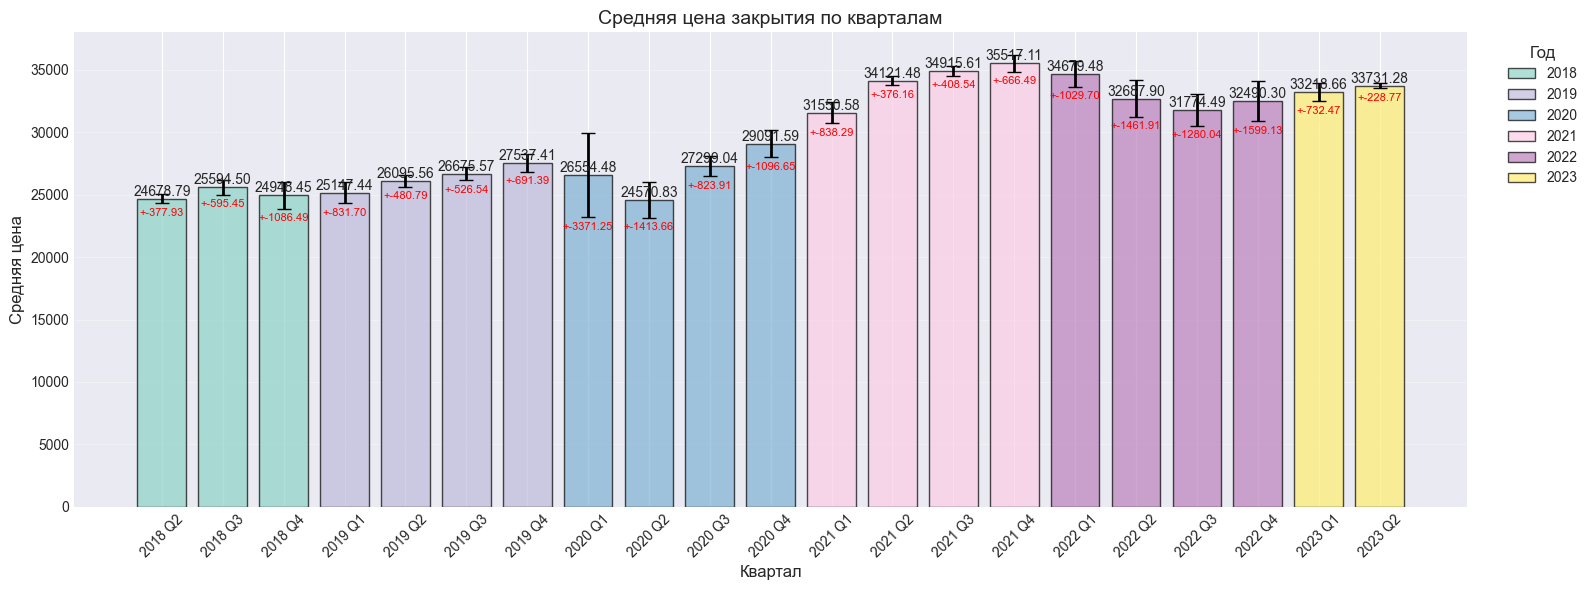

In [ ]:
quarterly_stats = df_copy.groupby(['Year', 'Quarter'])['Close'].agg(['mean', 'std', 'min', 'max'])

years = df_copy['Year'].unique()
years.sort()

color_palette = plt.cm.Set3(np.linspace(0, 1, len(years)))
fig, ax = plt.subplots(figsize=(16, 6))
x_pos = np.arange(len(quarterly_stats))

bar_colors = []
for year in sorted(years):
    # кол-во кварталов в году
    quarters_in_year = len([q for y, q in quarterly_stats.index if y == year])
    bar_colors.extend([color_palette[np.where(years == year)[0][0]]] * quarters_in_year)

bars = ax.bar(x_pos, quarterly_stats['mean'], 
              color=bar_colors, edgecolor='black', alpha=0.7,
              yerr=quarterly_stats['std'], capsize=5, error_kw={'elinewidth': 2})

ax.set_title('Средняя цена закрытия по кварталам', fontsize=14)
ax.set_xlabel('Квартал', fontsize=12)
ax.set_ylabel('Средняя цена', fontsize=12)
ax.set_xticks(x_pos)

xtick_labels = []
for year, quarter in quarterly_stats.index:
    xtick_labels.append(f"{year} Q{quarter}")
ax.set_xticklabels(xtick_labels, rotation=45)
ax.grid(True, alpha=0.3, axis='y')

for i, (bar, mean_val, std_val) in enumerate(zip(bars, quarterly_stats['mean'], quarterly_stats['std'])):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height(),
            f'{mean_val:.2f}', 
            ha='center', 
            va='bottom',
            fontsize=10)

    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() - std_val - 1000, 
            f'+-{std_val:.2f}', 
            ha='center', 
            va='baseline',
            fontsize=8, 
            color='red')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_palette[i], alpha=0.7, edgecolor='black', label=str(year)) 
                   for i, year in enumerate(years)]
ax.legend(handles=legend_elements, title='Год', title_fontsize=12, fontsize=10, 
          loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()
plt.show()

- явной взаимосвязи между кварталами внутри года не наблюдается
- можно заметить особенно большое стандартное отклонение в 2020 в первом квартале - именно тогда и начался кризис
- в следующие кварталы ситуация стабилизируется и к следующему году становится вновь стабильной

### Анализ по дням недели

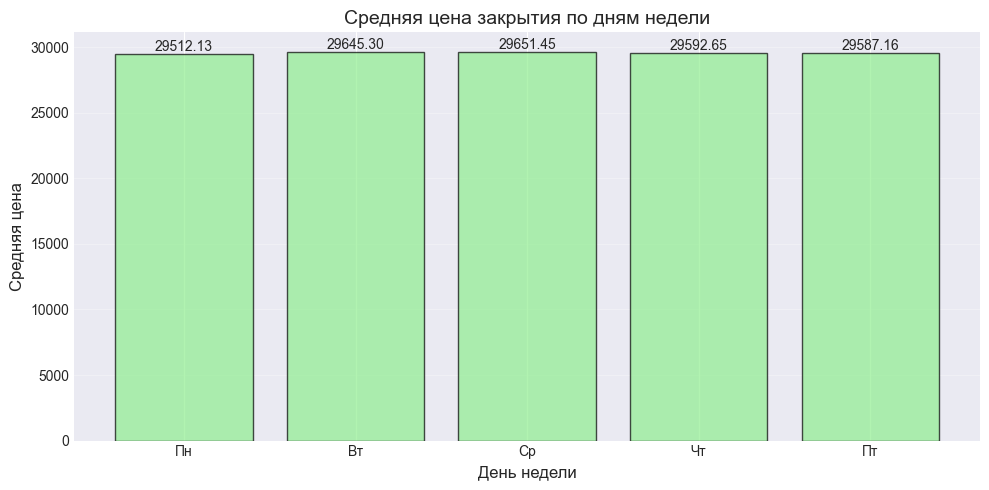

In [ ]:
weekday_stats = df_copy.groupby('Weekday')['Close'].mean()
    
fig, ax = plt.subplots(figsize=(10, 5))
x_pos = np.arange(len(weekday_stats))

bars = ax.bar(x_pos, weekday_stats, 
                color='lightgreen', edgecolor='black', alpha=0.7)

ax.set_title('Средняя цена закрытия по дням недели', fontsize=14)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Средняя цена', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт'], rotation=0)
ax.grid(True, alpha=0.3, axis='y')

for i, (bar, mean_val) in enumerate(zip(bars, weekday_stats.values)):
    ax.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 0.1,
            f'{mean_val:.2f}', 
            ha='center', 
            va='bottom',
            fontsize=10)

plt.tight_layout()
plt.show()

- дни недели вообще не отличаются друг от друга, что означает отсутствие влияния

## Анализ доходности

In [51]:
df['Daily_Return'] = df['Close'].pct_change() * 100

df['Cumulative_Return'] = (1 + df['Daily_Return']/100).cumprod() - 1

df['Volatility_30d'] = df['Daily_Return'].rolling(window=30).std()

df_pre_crisis = df[pre_crisis_mask]
df_crisis = df[crisis_mask]
df_post_crisis = df[post_crisis_mask]

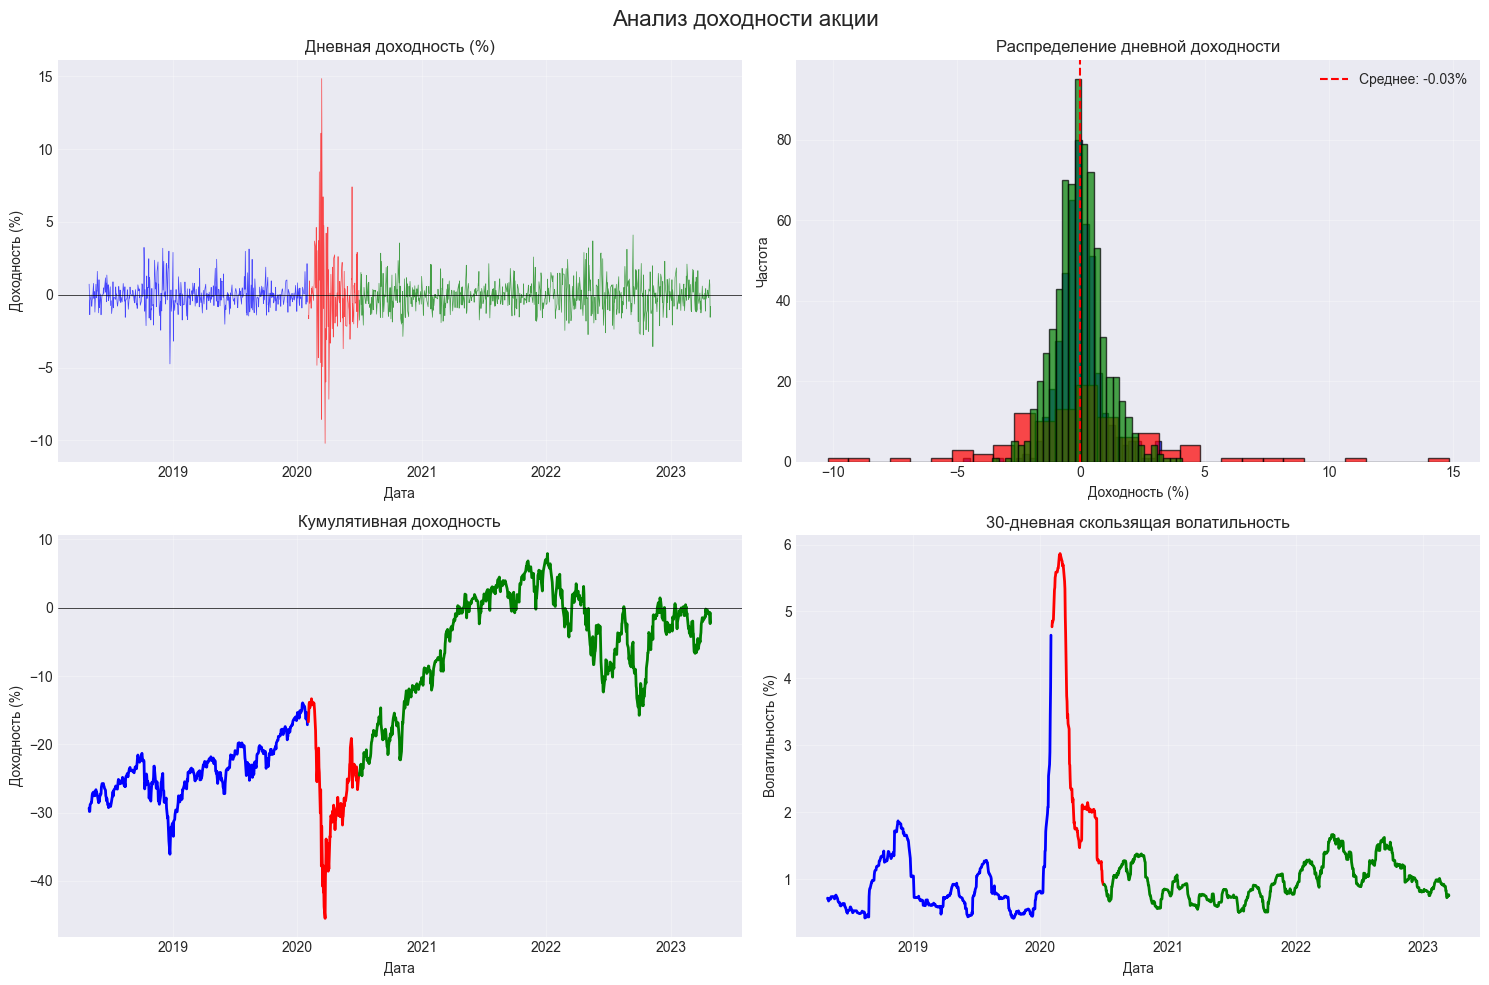


Статистика дневной доходности:


,count,mean,std,min,25%,50%,75%,max
Daily_Return,1257.000,-0.018,1.366,-10.205,-0.629,-0.072,0.471,14.846



Общая доходность за период: -29.32%


In [53]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(df_pre_crisis.index, df_pre_crisis['Daily_Return'], label='До кризиса', color='blue', alpha=0.7, linewidth=0.5)
axes[0, 0].plot(df_crisis.index, df_crisis['Daily_Return'], label='Период кризиса', color='red', alpha=0.7, linewidth=0.5)
axes[0, 0].plot(df_post_crisis.index, df_post_crisis['Daily_Return'], label='После кризиса', color='green', alpha=0.7, linewidth=0.5)
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0, 0].set_title('Дневная доходность (%)', fontsize=12)
axes[0, 0].set_xlabel('Дата')
axes[0, 0].set_ylabel('Доходность (%)')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df_pre_crisis['Daily_Return'].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
axes[0, 1].hist(df_crisis['Daily_Return'].dropna(), bins=30, color='red', alpha=0.7, edgecolor='black')
axes[0, 1].hist(df_post_crisis['Daily_Return'].dropna(), bins=30, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df['Daily_Return'].mean(), color='red', linestyle='--', 
                    label=f'Среднее: {df_post_crisis["Daily_Return"].mean():.2f}%')
axes[0, 1].set_title('Распределение дневной доходности', fontsize=12)
axes[0, 1].set_xlabel('Доходность (%)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df_pre_crisis.index, df_pre_crisis['Cumulative_Return'] * 100, color='blue', linewidth=2)
axes[1, 0].plot(df_crisis.index, df_crisis['Cumulative_Return'] * 100, color='red', linewidth=2)
axes[1, 0].plot(df_post_crisis.index, df_post_crisis['Cumulative_Return'] * 100, color='green', linewidth=2)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].set_title('Кумулятивная доходность', fontsize=12)
axes[1, 0].set_xlabel('Дата')
axes[1, 0].set_ylabel('Доходность (%)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(df_pre_crisis.index, df_pre_crisis['Volatility_30d'], color='blue', linewidth=2)
axes[1, 1].plot(df_crisis.index, df_crisis['Volatility_30d'], color='red', linewidth=2)
axes[1, 1].plot(df_post_crisis.index, df_post_crisis['Volatility_30d'], color='green', linewidth=2)
axes[1, 1].set_title('30-дневная скользящая волатильность', fontsize=12)
axes[1, 1].set_xlabel('Дата')
axes[1, 1].set_ylabel('Волатильность (%)')
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('Анализ доходности акции', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

print("\nСтатистика дневной доходности:")
return_stats = df['Daily_Return'].describe()
display(pd.DataFrame(return_stats).T)

print(f"\nОбщая доходность за период: {df['Cumulative_Return'].iloc[-1]*100:.2f}%")

- Распределение близко к стандартному нормальному ($N(0,1)$)